In [1]:
import glob
import os
import cv2
import glob
import importlib

import _pickle as pkl
import numpy as np
import pandas as pd

In [7]:
import analyze2p.utils as hutils
import analyze2p.plotting as pplot

import analyze2p.receptive_fields.utils as rfutils
import analyze2p.aggregate_datasets as aggr
import pylab as pl

In [9]:
visual_areas=['V1', 'Lm', 'Li']
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
meta = sdata[sdata.experiment.isin(['rfs', 'rfs10'])].copy()


/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 3 dsets


In [11]:
meta[(meta.visual_area=='Li') & (meta.experiment=='rfs')]

,experiment,visual_area,datakey,fov,animalid,session,fovnum
22,rfs,Li,20190522_JC089_fov1,FOV1_zoom2p0x,JC089,20190522,1
31,rfs,Li,20190602_JC091_fov1,FOV1_zoom2p0x,JC091,20190602,1
64,rfs,Li,20191017_JC113_fov1,FOV1_zoom2p0x,JC113,20191017,1


In [3]:
datakey = '20190522_JC089_fov1'
experiment='rfs'

traceid='traces001'
response_type='dff'
do_spherical_correction=False


In [4]:
fit_results, fit_params = rfutils.load_fit_results(datakey, experiment='rfs',
                                    traceid=traceid, response_type=response_type,
                                    do_spherical_correction=do_spherical_correction)
print(fit_results.keys())

dict_keys([8, 34, 35, 38, 42, 71, 75, 85, 99, 107, 115, 116, 119, 122, 124, 128, 137, 138, 139, 143, 145])


#### Loadng rfmap array (all cells, linearized rfmaps)

In [5]:
rfmaps_arr = rfutils.load_rfmap_array(fit_params['rfdir'],
                                do_spherical_correction=do_spherical_correction)
rfmaps_arr.head()


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.024074,0.010747,0.001546,0.031025,0.001337,0.052855,0.021832,-0.003631,-0.021135,-0.019676,...,0.013859,0.012459,0.004658,0.000825,0.010083,-0.000580,0.044204,0.067195,0.052156,0.033237
1,0.013007,0.007112,-0.017546,0.003044,0.007458,0.085862,-0.014338,0.011849,0.045059,0.025081,...,0.013238,0.007858,0.017777,0.004680,-0.018860,0.005104,0.039892,0.018528,0.012917,0.031681
2,-0.001962,0.022727,0.000967,0.010893,0.002552,0.073208,0.017420,-0.020798,0.003896,0.038404,...,0.000038,0.024719,0.005467,-0.005557,0.006944,-0.001626,0.026429,0.068510,0.004947,0.011341
3,0.013249,0.026864,-0.020983,0.030820,-0.005593,0.054879,0.023531,-0.010477,0.032261,-0.004042,...,0.034202,-0.018855,0.003829,-0.007829,-0.009101,-0.022131,0.019818,0.036503,-0.003777,0.004682
4,0.032593,0.021401,0.007846,0.018694,0.002531,0.069172,0.029076,-0.010087,0.034114,0.001669,...,0.011445,-0.017950,0.006238,-0.011931,-0.018113,-0.003088,0.010935,0.069423,0.021939,0.033000


In [246]:
rfmaps_arr.shape

(231, 152)

In [247]:
importlib.reload(rfutils)

<module 'analyze2p.receptive_fields.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/receptive_fields/utils.py'>

In [248]:
nx = len(fit_params['col_vals'])
ny = len(fit_params['row_vals'])

trialdata, labels = rfutils.load_trialdata(fit_params)
trials_by_cond = rfutils.get_trials_by_cond(labels)

--- processed traces: dff


In [249]:
rfmaps_arr = rfutils.group_trial_values_by_cond(trialdata)

In [250]:
# corr_rfmap = rfutils.sphr_correct_maps(rfmaps_arr, fit_params,multiproc=False)
# corr_rfmap = rfutils.load_rfmap_array(fit_params['rfdir'], 
#                               do_spherical_correction=True)

In [251]:
importlib.reload(rfutils)

<module 'analyze2p.receptive_fields.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/receptive_fields/utils.py'>

#### Test on single cell

In [252]:
rid = 99
rfmaps_arr[99].values.shape

(231,)

In [253]:
resolution_ds=[360, 640]

lin_x, lin_y = rfutils.get_lin_coords(resolution=resolution_ds, cm_to_deg=True)
cart_x, cart_y, sphr_th, sphr_ph = rfutils.get_spherical_coords(
     cart_pointsX=lin_x, cart_pointsY=lin_y, cm_to_degrees=False)

In [258]:
importlib.reload(rfutils)

<module 'analyze2p.receptive_fields.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/receptive_fields/utils.py'>

In [259]:
col_vals = fit_params['col_vals']
row_vals = fit_params['row_vals']
rfmap_values = rfmaps_arr[rid].copy()
rf_w= rfutils.warp_spherical_fromarr(rfmap_values, cart_x=cart_x, cart_y=cart_y,   
                       sphr_th=sphr_th, sphr_ph=sphr_ph, resolution=resolution_ds,
                       row_vals=row_vals, col_vals=col_vals,normalize_range=True)

In [255]:
# rfmap = rfmap_values.values.reshape(nx, ny).T
# rfmap_orig = rfutils.resample_map(rfmap, cart_x, cart_y,row_vals=row_vals, col_vals=col_vals,
#                           resolution=resolution_ds)
# rfmap_warp = rfutils.warp_spherical(rfmap_orig, sphr_th, sphr_ph, cart_x, cart_y,    
#                              normalize_range=True, method='linear')
# # Trim
# screen_bounds_pix = rfutils.get_screen_lim_pixels(cart_x, cart_y, 
#                                     row_vals=row_vals, col_vals=col_vals)

# rfmap_trim  = rfutils.trim_resampled_map(rfmap_orig, screen_bounds_pix)
# rfmap_o = cv2.resize(rfmap_trim, (nx, ny))
# # Test flatten order
# x = rfmap_o.flatten(order='F')
# rfmap_o2 = np.reshape(x, (nx, ny)).T

In [260]:
%matplotlib notebook

In [266]:
rfmaps_arr[rid].values==rf_w

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,

<IPython.core.display.Javascript object>


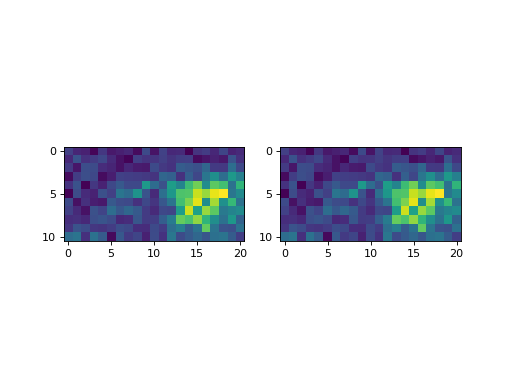

In [262]:
rm = np.reshape(rfmaps_arr[rid].values, (nx, ny)).T
test = np.reshape(rf_w, (nx, ny)).T
fig, axn = pl.subplots(1,2)
ax=axn[0]
ax.imshow(rm)

ax=axn[1]
ax.imshow(rfmap_o2)

In [267]:
fit_params['sigma_scale'], fit_params['scale_sigma']

(2.35, True)

In [268]:
importlib.reload(rfutils)
%matplotlib notebook

<IPython.core.display.Javascript object>


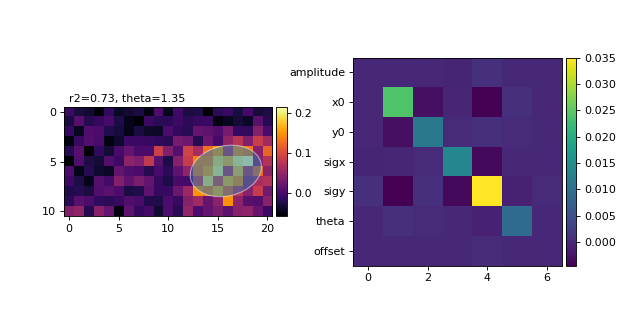

In [277]:
results_reg, fig = rfutils.plot_and_fit_roi_RF(rfmaps_arr[rid], row_vals, col_vals,
                                           scale_sigma=True, sigma_scale=2.35) 

<IPython.core.display.Javascript object>


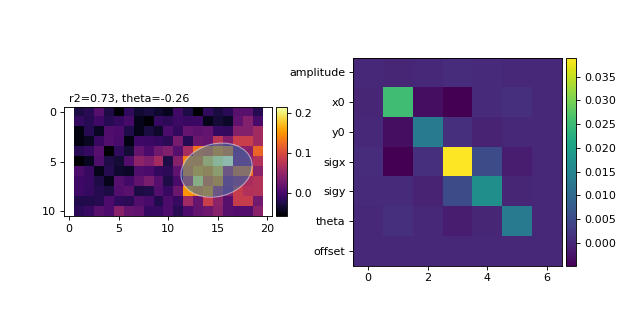

In [278]:
results_sphr, fig = rfutils.plot_and_fit_roi_RF(pd.Series(rf_w), row_vals, col_vals,
                                           scale_sigma=True, sigma_scale=2.35) 

In [305]:
importlib.reload(rfutils)
import analyze2p.aggregate_datasets as aggr

In [306]:
#results_sphr.keys()
fitr_sphr = {rid: results_sphr}
fitr_reg = {rid: results_reg}

fitdf_reg = rfutils.rfits_to_df(fitr_reg , fit_params, roi_list=[rid], 
                              scale_sigma=True, convert_coords=True)

fitdf_sphr = rfutils.rfits_to_df(fitr_sphr , fit_params, roi_list=[rid], 
                              scale_sigma=True, convert_coords=True)

print("Reg. no correction")
print(fitdf_reg.to_markdown())
print("Spherically corrected")
print(fitdf_sphr.to_markdown())


reg
reg
Reg. no correction
|    |      x0 |      y0 |   sigma_x |   sigma_y |   theta |     offset |   amplitude |       r2 |
|---:|--------:|--------:|----------:|----------:|--------:|-----------:|------------:|---------:|
| 99 | 29.0934 | 4.72264 |   25.2978 |   36.4199 | 1.34612 | -0.0131896 |    0.201303 | 0.729386 |
Spherically corrected
|    |      x0 |      y0 |   sigma_x |   sigma_y |   theta |    offset |   amplitude |       r2 |
|---:|--------:|--------:|----------:|----------:|--------:|----------:|------------:|---------:|
| 99 | 24.4225 | 4.30063 |   36.5255 |   26.5345 | 6.02114 | -0.015612 |    0.187113 | 0.726893 |


In [307]:
fit_params['use_linear'] = True

In [321]:
fitdf_reg

,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2
99,29.093374,4.722637,25.297816,36.419946,1.346117,-0.01319,0.201303,0.729386


In [326]:
fitr = {}
fitr['popt'] = copy.copy(fitr_reg[rid]['fit_r']['popt'])
amp_f, x0_f, y0_f, sigx_f, sigy_f, theta_f, offset_f = fitr['popt']
grid_points, cart_vals, sphr_vals = rfutils.coordinates_for_transformation(
    sphr_params)
# converted = fitdf_reg.apply(rfutils.apply_scaling_to_df, 
#                             args=(grid_points, sphr_vals), axis=1) 
# converted
x0_f, y0_f, sigx_f, sigy_f = rfutils.get_scaled_sigmas(grid_points, sphr_vals,
                                               x0_f, y0_f, sigx_f, sigy_f, theta_f,
                                               convert=True)
# fitr['popt'] = (amp_f, x0_f, y0_f, sigx_f, sigy_f, theta_f, offset_f)   
# sphr_params = copy.copy(fit_params)
# sphr_params['do_spherical_correction'] = True
testdf = rfutils.convert_fit_to_coords(fitdf_reg, sphr_params)
testdf

Screen res (ds=3x): [360, 640]
-- converting sphr
Screen res (ds=3x): [360, 640]


,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2
99,NaN,NaN,NaN,NaN,1.346117,-0.01319,0.201303,0.729386


In [336]:
testdf2 = pd.DataFrame({'x0': x0_f, 'y0': y0_f, 'sigma_x': sigx_f, 'sigma_y': sigy_f},
                       index=[rid])
testdf2*2.35

,x0,y0,sigma_x,sigma_y
99,81.583469,12.698201,27.560995,34.729675


In [333]:
testdf = rfutils.convert_fit_to_coords(fitdf_reg, sphr_params)
testdf

-- converting sphr
Screen res (ds=3x): [360, 640]


,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2
99,NaN,NaN,NaN,NaN,1.346117,-0.01319,0.201303,0.729386


In [334]:
fitdf_sphr

,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2
99,24.422507,4.300631,36.52548,26.534497,6.021142,-0.015612,0.187113,0.726893


In [335]:
fitdf_reg

,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2
99,29.093374,4.722637,25.297816,36.419946,1.346117,-0.01319,0.201303,0.729386


In [300]:
param_order =['amplitude', 'x0', 'y0', 'sigma_x', 'sigma_y', 'theta', 'offset']
pd.DataFrame(data=[np.array(tuple(fitr['popt']))],
             columns=param_order)


,amplitude,x0,y0,sigma_x,sigma_y,theta,offset
0,0.201303,34.71637,5.40349,11.728083,14.778585,1.346117,-0.01319


In [282]:
screen = hutils.get_screen_dims()
sdf = aggr.get_stimuli(datakey, 'rfs')

In [286]:
importlib.reload(rfutils)
%matplotlib notebook

<IPython.core.display.Javascript object>


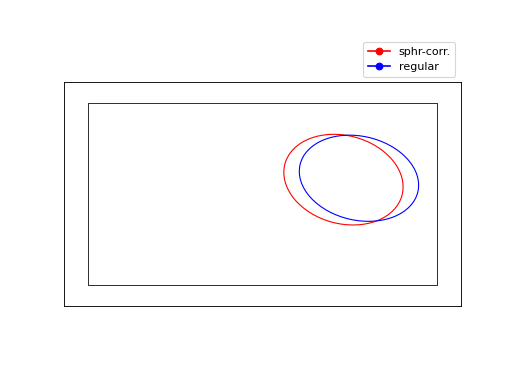

In [287]:
fig, ax = pl.subplots()
ax = rfutils.plot_rfs_to_screen_pretty(fitdf_sphr, sdf, screen, 
                           sigma_scale=1,
                           fit_roi_list=[rid], ax=ax, 
                           ellipse_lw=1, roi_colors=['r'])

ax = rfutils.plot_rfs_to_screen_pretty(fitdf_reg, sdf, screen, 
                           sigma_scale=1,
                           fit_roi_list=[rid], ax=ax, 
                            ellipse_lw=1, roi_colors=['b'])

leg_h = pplot.custom_legend_markers(colors=['r', 'b'], 
                                    labels=['sphr-corr.', 'regular'], marker='o')
ax.legend(handles=leg_h, bbox_to_anchor=(1,1), loc='lower right')

In [191]:
rid = 99
roidf = trialdata[[rid, 'config']]


,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,config,trial
0,0.028719,0.064309,-0.030544,0.063003,0.008206,-0.101212,0.048408,0.027061,0.123338,0.038459,...,0.007917,-0.090456,0.014250,0.065603,0.036362,0.037907,0.040256,0.148037,config216,0
1,0.042613,0.035144,-0.123989,-0.005691,0.010927,0.133943,0.184886,0.070137,-0.018134,0.087241,...,-0.036065,-0.028811,0.081758,-0.029896,0.093359,0.012199,-0.009254,0.068885,config083,1
2,0.063744,0.024082,-0.026987,-0.038143,0.005428,-0.030631,0.054766,0.080361,0.057264,0.231844,...,0.129420,0.122346,0.062845,0.065749,-0.058281,0.037414,-0.023979,-0.049566,config148,2
3,-0.045143,-0.020208,0.079090,0.035369,0.001673,0.159735,-0.005144,-0.069483,0.001025,0.099686,...,-0.001469,0.172664,-0.002429,0.045688,-0.047980,0.298143,0.274301,0.054489,config037,3
4,0.009805,0.039317,-0.172005,-0.060506,-0.020698,-0.115748,-0.106595,0.029999,-0.034159,-0.135609,...,0.030159,-0.002349,0.048806,-0.014588,-0.024152,-0.087820,-0.100514,-0.117819,config095,4


In [189]:
roi_fit_results

{'amplitude': 0.20130335890862947,
 'x0': 15.81867483393332,
 'y0': 5.944527338365689,
 'sigma_x': 2.153005603122387,
 'sigma_y': -3.09956988862042,
 'theta': 1.346117362970708,
 'offset': -0.013189566900592448,
 'r2': 0.7293864330206983,
 'fit_y': array([-0.01318957, -0.01318956, -0.01318955, -0.01318947, -0.01318914,
        -0.01318788, -0.01318352, -0.01317018, -0.01313381, -0.01304591,
        -0.01285786, -0.01250316, -0.01191665, -0.0110741 , -0.01003891,
        -0.00898438, -0.00815967, -0.00779793, -0.00801027, -0.00873084,
        -0.00974972, -0.01318956, -0.01318955, -0.01318948, -0.01318916,
        -0.0131878 , -0.01318267, -0.01316548, -0.01311415, -0.01297793,
        -0.01265732, -0.01199   , -0.01076674, -0.00880417, -0.00607605,
        -0.00284889,  0.00028151,  0.00253739,  0.00326459,  0.00223793,
        -0.0002266 , -0.0034284 , -0.01318956, -0.01318951, -0.01318927,
        -0.01318816, -0.01318357, -0.01316676, -0.01311179, -0.01295186,
        -0.01253847, -

In [71]:
import pylab as pl
%matplotlib notebook

<IPython.core.display.Javascript object>


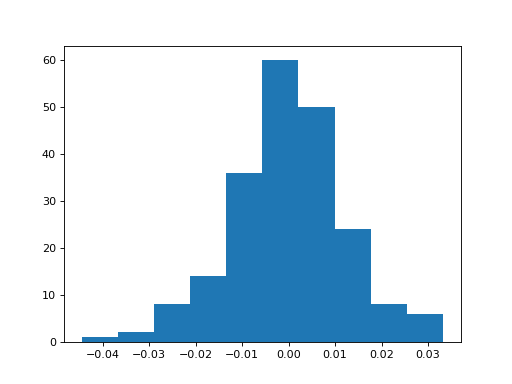

(array([ 1.,  2.,  8., 14., 36., 60., 50., 24.,  8.,  6.]),
 array([-0.04440791, -0.03665213, -0.02889636, -0.02114058, -0.01338481,
        -0.00562903,  0.00212674,  0.00988251,  0.01763829,  0.02539406,
         0.03314984]),
 <BarContainer object of 10 artists>)

In [72]:
pl.figure()
pl.hist(rfmaps_arr[0] - corr_rfmap[0])


In [34]:
rois = [r for r in trialdata.columns.tolist() if r not in ['config', 'trial']]
meanrs = trialdata.groupby('config').mean().reset_index()

,config,0,1,2,3,4,5,6,7,8,...,142,143,144,145,146,147,148,149,150,trial
0,config001,0.024074,0.010747,0.001546,0.031025,0.001337,0.052855,0.021832,-0.003631,-0.021135,...,0.012459,0.004658,0.000825,0.010083,-0.000580,0.044204,0.067195,0.052156,0.033237,1555.642857
1,config002,0.013007,0.007112,-0.017546,0.003044,0.007458,0.085862,-0.014338,0.011849,0.045059,...,0.007858,0.017777,0.004680,-0.018860,0.005104,0.039892,0.018528,0.012917,0.031681,1610.642857
2,config003,-0.001962,0.022727,0.000967,0.010893,0.002552,0.073208,0.017420,-0.020798,0.003896,...,0.024719,0.005467,-0.005557,0.006944,-0.001626,0.026429,0.068510,0.004947,0.011341,1551.142857
3,config004,0.013249,0.026864,-0.020983,0.030820,-0.005593,0.054879,0.023531,-0.010477,0.032261,...,-0.018855,0.003829,-0.007829,-0.009101,-0.022131,0.019818,0.036503,-0.003777,0.004682,1565.571429
4,config005,0.032593,0.021401,0.007846,0.018694,0.002531,0.069172,0.029076,-0.010087,0.034114,...,-0.017950,0.006238,-0.011931,-0.018113,-0.003088,0.010935,0.069423,0.021939,0.033000,1574.928571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,config227,-0.008761,0.008284,-0.001355,0.021555,0.009529,0.013215,0.007877,-0.004518,0.010519,...,-0.022978,-0.003616,-0.007536,-0.010337,0.002434,0.001906,0.013181,0.016652,-0.000671,1659.642857
227,config228,0.024024,0.005719,0.008982,0.002840,0.010272,-0.010542,-0.001577,-0.018968,0.012566,...,-0.029419,0.005224,-0.028671,-0.018461,0.026541,-0.003765,0.006659,0.014212,-0.026149,1519.071429
228,config229,-0.021274,0.000871,-0.010897,0.003775,-0.003856,-0.007268,-0.005788,-0.006249,-0.035518,...,-0.015019,0.023122,-0.005276,0.000792,0.005650,-0.018323,-0.020934,-0.002459,-0.007485,1642.642857
229,config230,0.000979,-0.010046,-0.031381,-0.004037,0.001274,-0.049496,-0.020701,-0.013283,0.001828,...,-0.022189,-0.015331,0.008582,-0.017140,-0.007950,-0.013651,-0.030116,-0.032232,-0.014044,1613.714286


In [35]:
meanrs[rois]

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.024074,0.010747,0.001546,0.031025,0.001337,0.052855,0.021832,-0.003631,-0.021135,-0.019676,...,0.013859,0.012459,0.004658,0.000825,0.010083,-0.000580,0.044204,0.067195,0.052156,0.033237
1,0.013007,0.007112,-0.017546,0.003044,0.007458,0.085862,-0.014338,0.011849,0.045059,0.025081,...,0.013238,0.007858,0.017777,0.004680,-0.018860,0.005104,0.039892,0.018528,0.012917,0.031681
2,-0.001962,0.022727,0.000967,0.010893,0.002552,0.073208,0.017420,-0.020798,0.003896,0.038404,...,0.000038,0.024719,0.005467,-0.005557,0.006944,-0.001626,0.026429,0.068510,0.004947,0.011341
3,0.013249,0.026864,-0.020983,0.030820,-0.005593,0.054879,0.023531,-0.010477,0.032261,-0.004042,...,0.034202,-0.018855,0.003829,-0.007829,-0.009101,-0.022131,0.019818,0.036503,-0.003777,0.004682
4,0.032593,0.021401,0.007846,0.018694,0.002531,0.069172,0.029076,-0.010087,0.034114,0.001669,...,0.011445,-0.017950,0.006238,-0.011931,-0.018113,-0.003088,0.010935,0.069423,0.021939,0.033000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,-0.008761,0.008284,-0.001355,0.021555,0.009529,0.013215,0.007877,-0.004518,0.010519,0.017473,...,-0.010129,-0.022978,-0.003616,-0.007536,-0.010337,0.002434,0.001906,0.013181,0.016652,-0.000671
227,0.024024,0.005719,0.008982,0.002840,0.010272,-0.010542,-0.001577,-0.018968,0.012566,0.023299,...,-0.026303,-0.029419,0.005224,-0.028671,-0.018461,0.026541,-0.003765,0.006659,0.014212,-0.026149
228,-0.021274,0.000871,-0.010897,0.003775,-0.003856,-0.007268,-0.005788,-0.006249,-0.035518,-0.024359,...,0.000813,-0.015019,0.023122,-0.005276,0.000792,0.005650,-0.018323,-0.020934,-0.002459,-0.007485
229,0.000979,-0.010046,-0.031381,-0.004037,0.001274,-0.049496,-0.020701,-0.013283,0.001828,-0.012257,...,0.001218,-0.022189,-0.015331,0.008582,-0.017140,-0.007950,-0.013651,-0.030116,-0.032232,-0.014044


In [211]:
eval_results, _ = rfutils.load_eval_results(datakey, 
                                         rfdir=fit_params['rfdir'])

In [212]:
importlib.reload(rfutils)

<module 'analyze2p.receptive_fields.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/receptive_fields/utils.py'>

In [213]:

fitdf = rfutils.rfits_to_df(fit_results, fit_params=fit_params,
                    scale_sigma=fit_params['scale_sigma'],
                    sigma_scale=fit_params['sigma_scale'])
fitdf = fitdf[fitdf['r2']>fit_params['fit_thr']] 
fitdf.head()

,x0,y0,sigma_x,sigma_y,theta,offset,amplitude,r2
85,1.111327,5.854219,45.961738,34.231365,0.216454,-0.004747,0.087992,0.631459
99,29.093374,4.722637,25.297816,36.419946,1.346117,-0.013190,0.201303,0.729386
115,-0.359113,25.227100,39.363303,31.265256,5.491278,-0.000514,0.089948,0.520312
122,3.931988,24.304596,31.689498,36.726465,6.074524,0.000724,0.086744,0.559490


In [214]:
fit_params['rfdir'].split('/traces/')[1].split('_')[0]

'traces001'

In [215]:
roi_list = sorted(list(fit_results.keys()))
fit_results.keys()

dict_keys([8, 34, 35, 38, 42, 71, 75, 85, 99, 107, 115, 116, 119, 122, 124, 128, 137, 138, 139, 143, 145])

In [216]:
trialdata, labels = rfutils.load_trialdata(fit_params) 
print(trialdata.shape)
roidf_list = [trialdata[[roi, 'config', 'trial']] for roi in roi_list] 
print(len(roidf_list))

--- processed traces: dff
(3218, 153)
21


In [199]:
# grid_points, cart_values, sphr_values = rfutils.coordinates_for_transformation(fit_params)

In [217]:
roi_df = roidf_list[0]
roi = int(np.unique([r for r in roi_df.columns if r not in ['config', 'trial']]))
print(roi)

8


In [218]:
responses_df = pd.concat([pd.Series(g[roi], name=c)\
                          .reset_index(drop=True)\
                          for c, g in roi_df.groupby(['config'])], axis=1)\
                .dropna(axis=0)        
responses_df.head()

,config001,config002,config003,config004,config005,config006,config007,config008,config009,config010,...,config222,config223,config224,config225,config226,config227,config228,config229,config230,config231
0,0.088802,0.082268,0.083594,0.394213,0.083014,-0.019299,0.019684,0.014170,0.000715,-0.056466,...,0.131693,-0.051860,0.081692,-0.025559,0.058455,0.118950,0.209998,-0.067164,-0.035368,0.050997
1,-0.038966,0.078507,0.025945,0.074145,0.039140,-0.029266,0.101995,0.089975,0.088247,-0.275126,...,0.052664,-0.017283,0.060977,-0.010288,0.014480,0.093032,-0.023654,0.046771,-0.035392,-0.014198
2,-0.052415,0.021872,0.182880,0.001324,0.164050,0.132536,0.084930,0.040462,0.110055,-0.095682,...,-0.077835,0.002186,-0.052675,-0.005013,0.071007,-0.002945,-0.112674,-0.086891,0.027839,0.015950
3,0.045231,0.109413,-0.039715,-0.035165,0.146111,0.012827,0.053949,0.144294,0.004154,-0.034032,...,0.077753,-0.032614,-0.098132,0.026587,0.058939,0.178565,-0.017151,0.012635,-0.072397,-0.053088
4,0.012412,0.193124,-0.063375,0.016835,-0.017494,0.045923,0.053670,0.149577,-0.018444,0.020561,...,0.061476,0.098676,-0.127758,-0.044008,0.111688,-0.034105,-0.008238,0.013623,-0.024243,0.045206


In [219]:
nx=len(fit_params['col_vals'])
ny=len(fit_params['row_vals'])
n_reps, n_conds = responses_df.shape
n_bootstrap_iters = 500 #fit_params['evaluation']['n_bootstrap_iters']

In [180]:
bootresp_ = pd.concat([responses_df.sample(n_reps, replace=True).mean(axis=0)
                   for ni in range(n_bootstrap_iters)], axis=1)
bootresp = bootresp_.apply(rfutils.reshape_array_for_nynx, args=(nx, ny))
bootresp.shape

In [183]:
param_order =['amp', 'x0', 'y0', 'sigma_x', 'sigma_y', 'theta', 'offset', 'r2']

do_spherical_correction = fit_params['do_spherical_correction']

min_sigma=2.5
max_sigma=50
row_vals = fit_params['row_vals']
col_vals = fit_params['col_vals']
xres=1 if do_spherical_correction else float(np.unique(np.diff(row_vals)))
yres=1 if do_spherical_correction else float(np.unique(np.diff(col_vals)))

sigma_scale=2.35
sigma_scale=1 if do_spherical_correction else sigma_scale 

In [184]:
bparams=[]
for ii in bootresp.columns:
    response_vector = bootresp[ii].values
    # nx=len(col_vals), ny=len(row_vals)
    rfmap = rfutils.get_rf_map(response_vector, nx, ny) 
    fitr, fit_y = rfutils.do_2d_fit(rfmap, nx=nx, ny=ny) 
    if fitr['success']:
        amp_f, x0_f, y0_f, sigx_f, sigy_f, theta_f, offset_f = fitr['popt']
        if fit_params['do_spherical_correction']:
            # Correct for spher correction, if nec
            x0_f, y0_f, sigx_f, sigy_f = rfutils.get_scaled_sigmas(
                                                grid_points, sphr_values,
                                                x0_f, y0_f,
                                                sigx_f, sigy_f, theta_f,
                                                convert=True)
            fitr['popt'] = (amp_f, x0_f, y0_f, sigx_f, sigy_f, theta_f, offset_f) 
        if any(s<min_sigma for s \
                in [abs(sigx_f)*xres*sigma_scale, abs(sigy_f)*yres*sigma_scale])\
                or any(s > max_sigma for s \
                in [abs(sigx_f)*xres*sigma_scale, abs(sigy_f)*yres*sigma_scale]):
            fitr['success'] = False
    # If the fit for current bootstrap sample is good, 
    # add it to dataframe of bootstrapped rf params
    if fitr['success']:
        #amp_f, x0_f, y0_f, sigx_f, sigy_f, theta_f, offset_f = fitr['popt']
        curr_fit_results = list(fitr['popt'])
        curr_fit_results.append(fitr['r2'])
        bparams.append(tuple(curr_fit_results)) #(fitr['popt'])       
paramsdf = pd.DataFrame(data=np.array(bparams),
                        columns = param_order)
paramsdf['cell'] = roi

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/scipy/interpolate/_fitpack_impl.py:728: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


In [222]:
importlib.reload(rfutils)

<module 'analyze2p.receptive_fields.utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/receptive_fields/utils.py'>

In [225]:
%matplotlib notebook

<IPython.core.display.Javascript object>


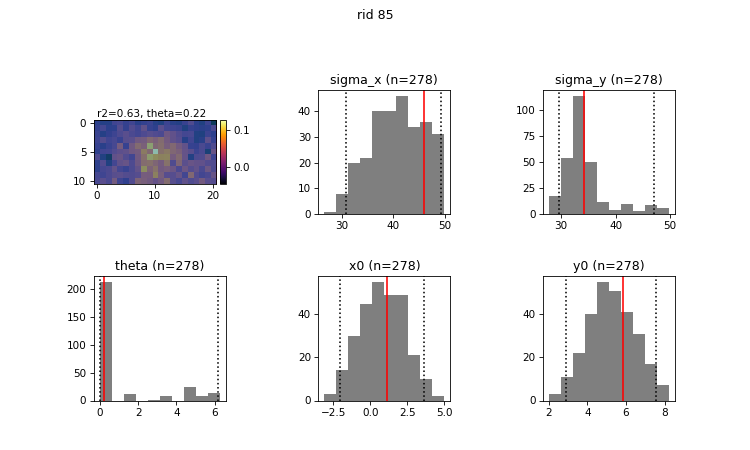

In [226]:
rid = 85
rfmap = fit_results[rid]['data']       
bootdfs = eval_results['bootdf']
bootdf_roi = bootdfs[bootdfs['cell']==rid]    
fig = rfutils.plot_roi_evaluation(rid, fitdf.loc[rid], rfmap, bootdf_roi)

In [227]:
params = ['amplitude', 'x0', 'y0', 'sigma_x', 'sigma_y', 'theta', 'offset', 'r2']   

In [231]:
import analyze2p.extraction.rois as roiutils

In [253]:
fitdf_roi = fitdf.loc[rid]
fitdf_roi[params]
session, animalid, fovn = hutils.split_datakey_str(datakey)      
traceid='traces001'
fovcoords = roiutils.load_roi_coords(animalid, session, 'FOV%i_zoom2p0x' % fovn,
                                     traceid=traceid, create_new=False)     
posdf = pd.concat([fitdf,
                   fovcoords['roi_positions'].loc[fitdf.index]], axis=1)
posdf = posdf.rename(columns={'x0': 'xpos_rf', 'y0': 'ypos_rf', 
                              'ml_pos': 'xpos_fov', 'ap_pos': 'ypos_fov'})
posdf

,xpos_rf,ypos_rf,sigma_x,sigma_y,theta,offset,amplitude,r2,fov_xpos,fov_xpos_pix,fov_ypos,fov_ypos_pix,xpos_fov,ypos_fov
85,1.111327,5.854219,45.961738,34.231365,0.216454,-0.004747,0.087992,0.631459,463.204697,201,542.559687,285,430.240313,714.395303
99,29.093374,4.722637,25.297816,36.419946,1.346117,-0.013190,0.201303,0.729386,695.959295,302,603.478669,317,369.321331,481.640705
115,-0.359113,25.227100,39.363303,31.265256,5.491278,-0.000514,0.089948,0.520312,467.813699,203,801.465362,421,171.334638,709.786301
122,3.931988,24.304596,31.689498,36.726465,6.074524,0.000724,0.086744,0.559490,504.685714,219,856.673190,450,116.126810,672.914286


In [266]:
importlib.reload(rfutils)
%matplotlib notebook

In [267]:
reliable_rois = eval_results['reliable_rois'] 
len(reliable_rois)

3

<IPython.core.display.Javascript object>


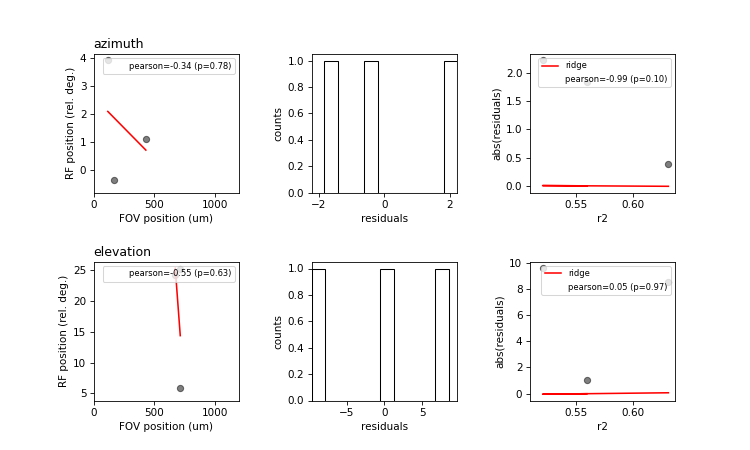

[azimuth] Mean squared error: 1.68 | Variance score: 0.11
[elevation] Mean squared error: 7.45 | Variance score: 0.30


In [268]:
fig = rfutils.plot_linear_regr_by_condition( posdf.loc[reliable_rois],model='ridge')


In [270]:
rfutils.compare_regr_to_boot_params(eval_results, posdf, outdir=evaldir)

NameError: name 'evaldir' is not defined